# BELLABEAT CAPSTONE PROJECT

## Background
Bellabeat is a high-tech company that manufactures health-focused smart products and is founded by Urska Srsen (Chief Creative Officer) and Sando Mur (Mathematician and key member of Bellabeat executive team).
For this mock project, I am working as a Junior Data Analyst in Bellabeat's marketing analyst team and have been given the task to analyse smart device usage data to unlock new growth opportunities for the company. The results from the analysis will be presented to the company's executive team along with high-level recommendations for Bellabeat's marketing strategy.

# PHASE 1: ASK
In this phase, a clear business task statement needs to be determined to align to and guide the entire project. I have been given a task by Srsen to look into non-Bellabeat smart devices user data and see what insights can be discovered and applied on one of Bellabeat products. With this in mind, I have came up with the following business task statement:

*To determine which products within the Bellabeat ecosystem to market to its existing customers by analyzing trends from publicly available data of non-Bellabeat smart devices and gaining insights from the data to drive Bellabeat's marketing strategy for that Bellabeat product.*   

# PHASE 2: PREPARE

For this analysis, I used a publically available dataset on Fitbit Fitness tracker data, provided by Mobius on Kaggle. The dataset consists of thirty eligible Fitbit users who consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It also includes information about daily activity, steps, and hear rate that can be used to explore users' habits.

Out of the 18 datasets provided, I chose 6 datasets for my analysis, which are the daily data (i.e. daily activity, intensity, sleep, steps, calories) and user weight log. 

In [1]:
library(tidyverse)
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
user_weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 413 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed


ℹ Use `spec()` to retrieve the

Before proceeding with the analysis, there are a few limitations to the data that should be highlighted:
1. SAMPLE SIZE: The sample size from this dataset involves only 30 individuals, which is just enough to be statiscally significant but would be insufficient to drive a key business marketing decision. The insights uncovered from this dataset should be explored further with a much larger dataset, preferably from Bellabeat's own user data.
2. TIMEFRAME: The datasets only covers a period from 12 March to 12 May 2016, which is just 62 days. Longer periods of at least 6 months data are needed as they are useful in establishing habits and behaviour in individuals. 
3. MISSING METRICS: Some key user stats such as gender, age, height, weight and ethnicity, which are useful to the overall analysis, are not available.
4. BIAS: The nature of how this datset is obtained may create a bias towards more active and participative users as these users volunteer their data to be tracked and published in a public database. 
5. FITBIT AND BELLABEAT: This dataset comes from Fitbit devices which may consists of users from all genders (due to the absence of gender data, the exact gender composition cannot be determined) while Bellabeat devices are marketed mostly towards female.   

# PHASE 3: PROCESS

The first cleaning process I did was to convert the dates within the dataset to datetime format and also standardised the column name of the dates to 'Date'. With the dates and column name now standardised across the datasets, I can merge all the daily datasets into a single dataset later on for easier analysis.

In [2]:
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate, format = "%m/%d/%Y")
daily_sleep <- daily_sleep %>% mutate(SleepDay = as.Date(SleepDay,format="%m/%d/%Y"))
daily_activity <- rename(daily_activity, Date = ActivityDate)
daily_sleep <- rename(daily_sleep, Date = SleepDay)


# PHASE 4 & 5: ANALYZE AND SHARE
The first thing I wanted to do after cleaning my data was to understand the users who provided the data. To do this, I group the data within each daily dataset by user's unique ID, average the metrics (i.e. steps, intensities, calories, sleep and BMI) across the dates and merge these data together into a single dataframe.  

In [3]:
user_avg_BMI <- user_weight_log %>% group_by(Id) %>% summarise(avgBMI = mean(BMI))
user_avg_activeness <- daily_activity %>% group_by(Id) %>% summarise(avgSteps = mean(TotalSteps),avgVA = mean(VeryActiveMinutes),avgFA = mean(FairlyActiveMinutes),avgLA = mean(LightlyActiveMinutes),avgSed=mean(SedentaryMinutes),avgCalories = mean(Calories))
user_avg_sleep <- daily_sleep %>% group_by(Id) %>% filter(n() > 3) %>% summarise(avgSleep = mean(TotalMinutesAsleep))
user_summary <- merge(merge(user_avg_activeness,user_avg_sleep,by="Id",all=TRUE),user_avg_BMI,by="Id",all=TRUE)
user_analysis <-user_summary[,c("Id","avgSteps","avgVA","avgFA","avgLA","avgSed","avgCalories","avgSleep","avgBMI")]
#options(repr.plot.width = 20, repr.plot.height = 20)
#ggpairs(user_analysis)
#avgPctActiveMins = mean((VeryActiveMinutes + FairlyActiveMinutes+LightlyActiveMinutes)/(VeryActiveMinutes + FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes)), avgPctHighActive = mean((VeryActiveMinutes + FairlyActiveMinutes)/(VeryActiveMinutes + FairlyActiveMinutes+LightlyActiveMinutes))
print(user_analysis)
summary(user_analysis)

           Id  avgSteps       avgVA      avgFA     avgLA    avgSed avgCalories
1  1503960366 12116.742 38.70967742 19.1612903 219.93548  848.1613    1816.419
2  1624580081  5743.903  8.67741935  5.8064516 153.48387 1257.7419    1483.355
3  1644430081  7282.967  9.56666667 21.3666667 178.46667 1161.8667    2811.300
4  1844505072  2580.065  0.12903226  1.2903226 115.45161 1206.6129    1573.484
5  1927972279   916.129  1.32258065  0.7741935  38.58065 1317.4194    2172.806
6  2022484408 11370.645 36.29032258 19.3548387 257.45161 1112.5806    2509.968
7  2026352035  5566.871  0.09677419  0.2580645 256.64516  689.4194    1540.645
8  2320127002  4716.871  1.35483871  2.5806452 198.19355 1220.0968    1724.161
9  2347167796  9519.667 13.50000000 20.5555556 252.50000  687.1667    2043.444
10 2873212765  7555.774 14.09677419  6.1290323 308.00000 1097.1935    1916.968
11 3372868164  6861.650  9.15000000  4.1000000 327.90000 1077.5500    1933.100
12 3977333714 10984.567 18.90000000 61.2666667 174.7

       Id               avgSteps           avgVA              avgFA        
 Min.   :1.504e+09   Min.   :  916.1   Min.   : 0.09677   Min.   : 0.2581  
 1st Qu.:2.347e+09   1st Qu.: 5566.9   1st Qu.: 3.58065   1st Qu.: 4.0345  
 Median :4.445e+09   Median : 7283.0   Median :10.38710   Median :12.3226  
 Mean   :4.857e+09   Mean   : 7519.3   Mean   :20.30877   Mean   :13.2602  
 3rd Qu.:6.962e+09   3rd Qu.: 9519.7   3rd Qu.:23.41935   3rd Qu.:19.3548  
 Max.   :8.878e+09   Max.   :16040.0   Max.   :87.33333   Max.   :61.2667  
                                                                           
     avgLA            avgSed        avgCalories      avgSleep    
 Min.   : 38.58   Min.   : 662.3   Min.   :1483   Min.   :127.6  
 1st Qu.:143.84   1st Qu.: 766.4   1st Qu.:1917   1st Qu.:372.7  
 Median :206.19   Median :1077.5   Median :2132   Median :432.0  
 Mean   :191.52   Mean   : 999.2   Mean   :2282   Mean   :401.9  
 3rd Qu.:245.81   3rd Qu.:1206.6   3rd Qu.:2600   3rd Qu.:450.

### Who are our users?
1. ID: There are 33 unique ID for the datasets. However, this differs from the stated sample size in the dataset description of 30 individuals. There is a chance that two or more different fitness devices could come from the same individual. For the purpose of my analysis, I will treat each unique ID as a separate individual.
2. STEPS: The 33 users in the sample size are lightly active individuals with an average of 7,519 steps per day. However, this falls below the recommended 10,000 steps per day recommendation by most health professionals and organisation.
3. ACTIVITY INTENSITY (in Minutes): Among the three activity intensities, the users spend a big proportion of active time on Light Activity at an average of 191.52 minutes or about 3 hours 12 minutes per day.
4. CALORIES: The users burned an average of 2,282 calories per day. A conclusion on the health benefits cannot be made with just the calories number by itself without considering the gender, age, height, weight, and dietary calorie intake of the individual.
5. SLEEP: Among the available user sleep data available and also after excluding those that only key in less than 3 days worth of data (22 users), the users have an average of about 406 minutes of sleep, or about 6 hours 45 minutes. This is lower than the recommended sleep duration of at least 7 hours per night (https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html).
5. BMI: Out of the sample size of 33 users, only 8 users actually keyed in their BMI data. From this small sample, the average BMI was found to be 27.99, which falls under the 'Overweight' category.


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



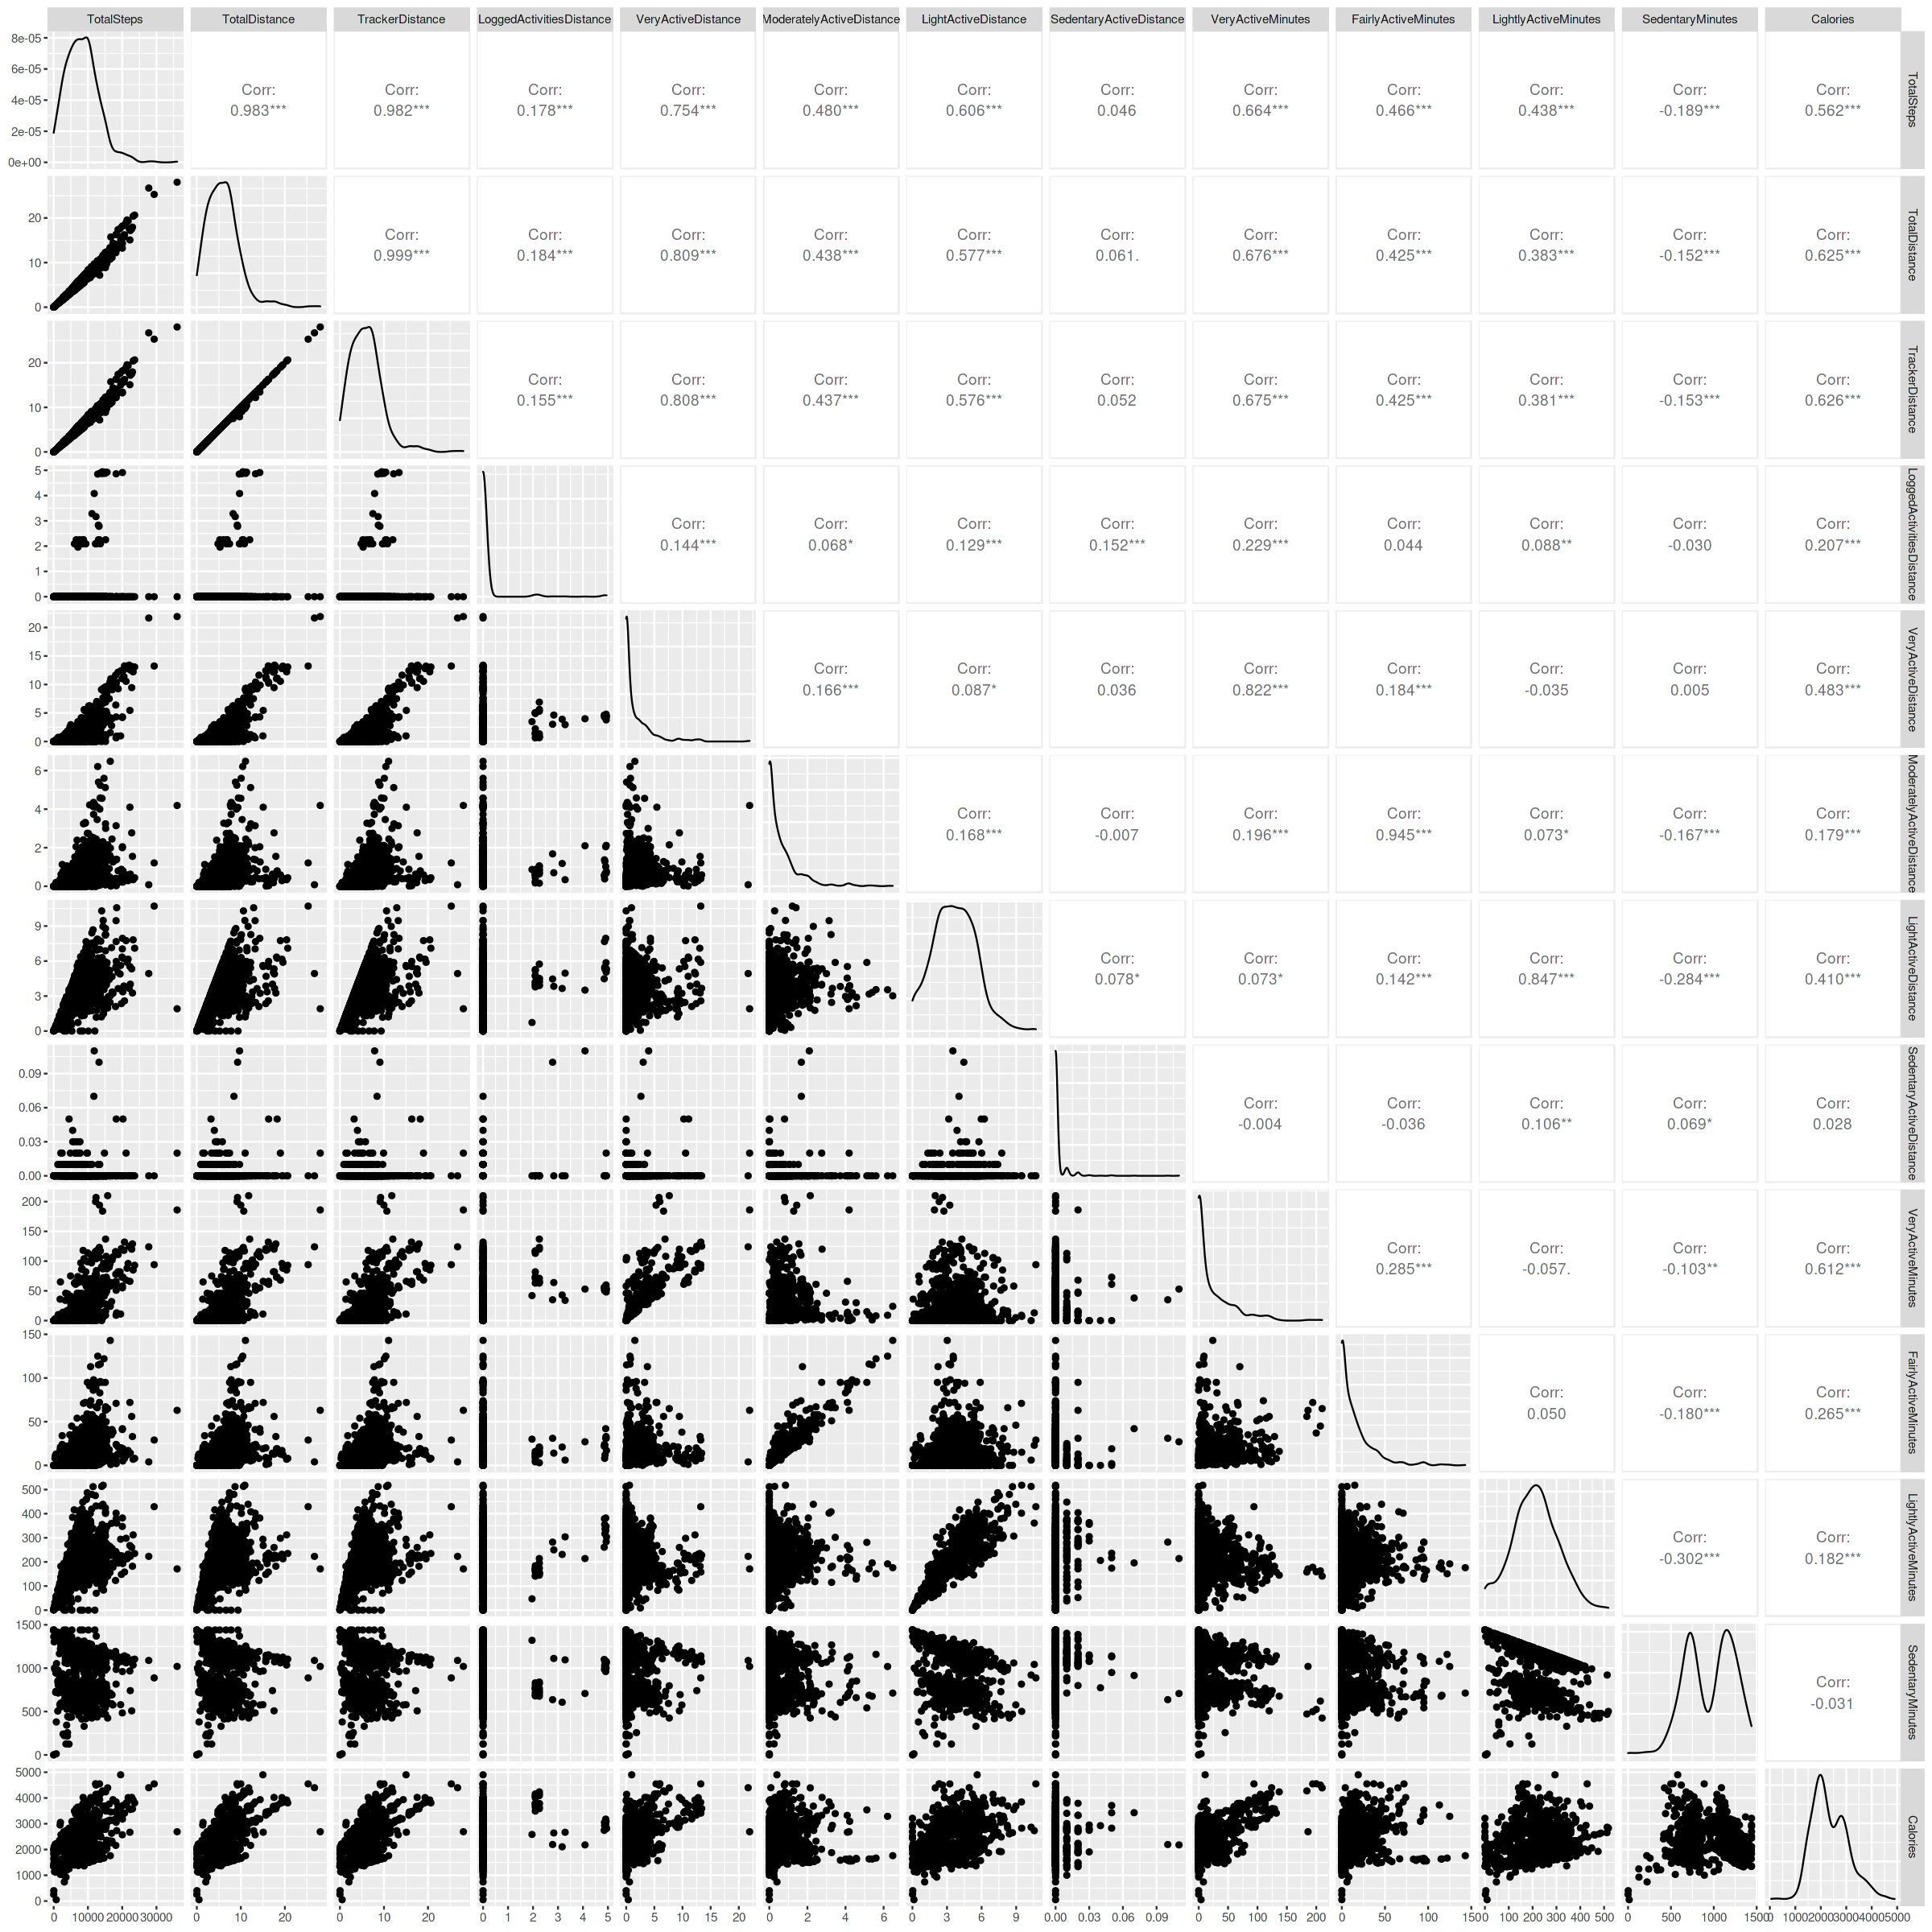

In [4]:
library("GGally")
activity_pair_analysis <- daily_activity[,c(3:15)]
activity_pair_analysis <- subset(activity_pair_analysis,TotalSteps != 0)
options(repr.plot.width = 20, repr.plot.height = 20)
ggpairs(activity_pair_analysis)

### Pairwise analysis of the Daily Activity dataset
1. Activity Minutes (i.e. Very Active, Fairly Active and Lightly Active Minutes) and its correspondonding Activity Distance (i.e. Very Active, Moderately Active and Lightly Active Distance) have a high correlation (above 0.8). Due to the high correlation and Activity Minutes by intensity providing a clearer and direct link to health benefits than Activity Distance by intensity (30 minutes of medium intensity exercise vs 5km of medium intensity exercise), I will be focusing on the former rather than the latter for my analysis. 
2. The data for TotalDistance and TrackerDistance have very high correlation, showing that they are nearly identical (close to 1) and could essentially be the same metrics with insignificant differences. Based on the metadata available from Fitabase (https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf), TrackerDistance is distance tracked only by the Fitbit device while TotalDistance would also include user input distance.
3. Total calories burned has the highest correlation with Total Distance and Very Active Minutes, and lowest correlation with Sedentary Minutes. This is in line with the notion that longer and more intense exercise burns the most calories. 

### Analysing the Activity by Days of the Week
Next, I look at the Daily Activity data grouped by the days of the week. I assigned the days of the week to the dates within the dataframe and group the data by it. Then, I get the average of the key metrics (i.e. Steps, Distance, Activity Intensity Minutes) by day.  

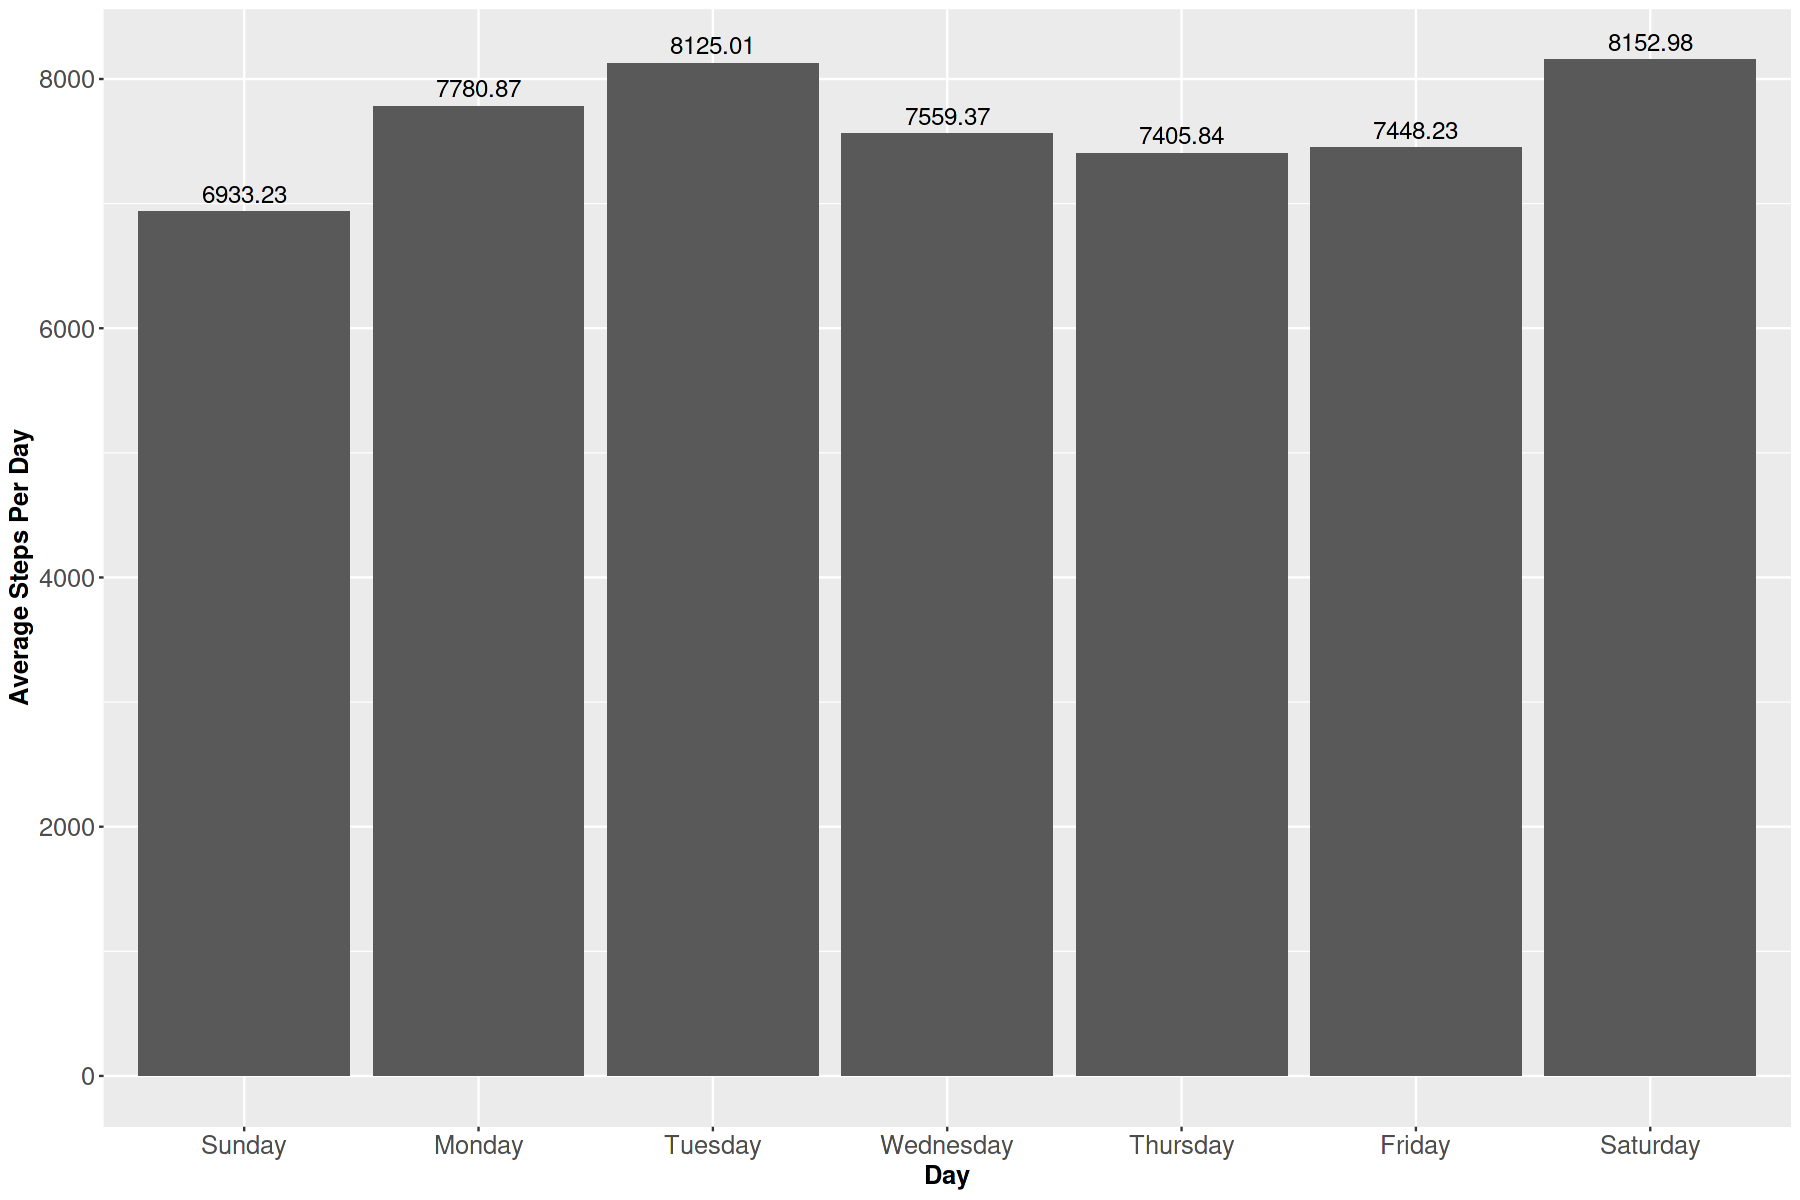

In [5]:
daily_activity$Day <- weekdays(daily_activity$Date)
daysOrder <- c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
step_intensity_analysis <- daily_activity %>% group_by(Day) %>% summarise(avgSteps=mean(TotalSteps),avgDistance=mean(TotalDistance),avgVAMins = mean(VeryActiveMinutes), avgFAMins = mean(FairlyActiveMinutes), avgLAMins = mean(LightlyActiveMinutes), avgSedMins = mean(SedentaryMinutes), avgCal = mean(Calories)) 
step_intensity_analysis$Day <- factor(step_intensity_analysis$Day, levels = daysOrder) 
step_intensity_analysis <- step_intensity_analysis[order(step_intensity_analysis$Day),]
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(step_intensity_analysis,aes(x=Day,y=avgSteps))+geom_col()+geom_text(aes(label=sprintf("%0.2f",round(avgSteps,digits=2))),size=5,vjust = -0.5)+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15,face="bold"))+labs(y="Average Steps Per Day")

First thing I did was to look at the steps data by day:

1. From the steps data, it can be seen that Saturday clocks in the highest number of steps while Sunday is the lowest. This could be attributed to Saturdays being a non-working day and individuals are free to move about either for leisure and/or to dedicate more time into physical activities. Many regarded Sundays as rest days, thus the low average steps. 
2. There is also a significant rise in the average steps after Sunday, peaking at about 8,125 steps on Tuesday before reducing to about 7,500 steps for the rest of the weekdays. This could be due to the fact that Monday can be seen to best day to start their physical activity routine after resting on Sunday, with momentum helping to push the average steps up on Tuesday.
3. The reduction that happens after Tuesday could be due to individuals 'normalising' their physical activity after Tuesday spike.


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




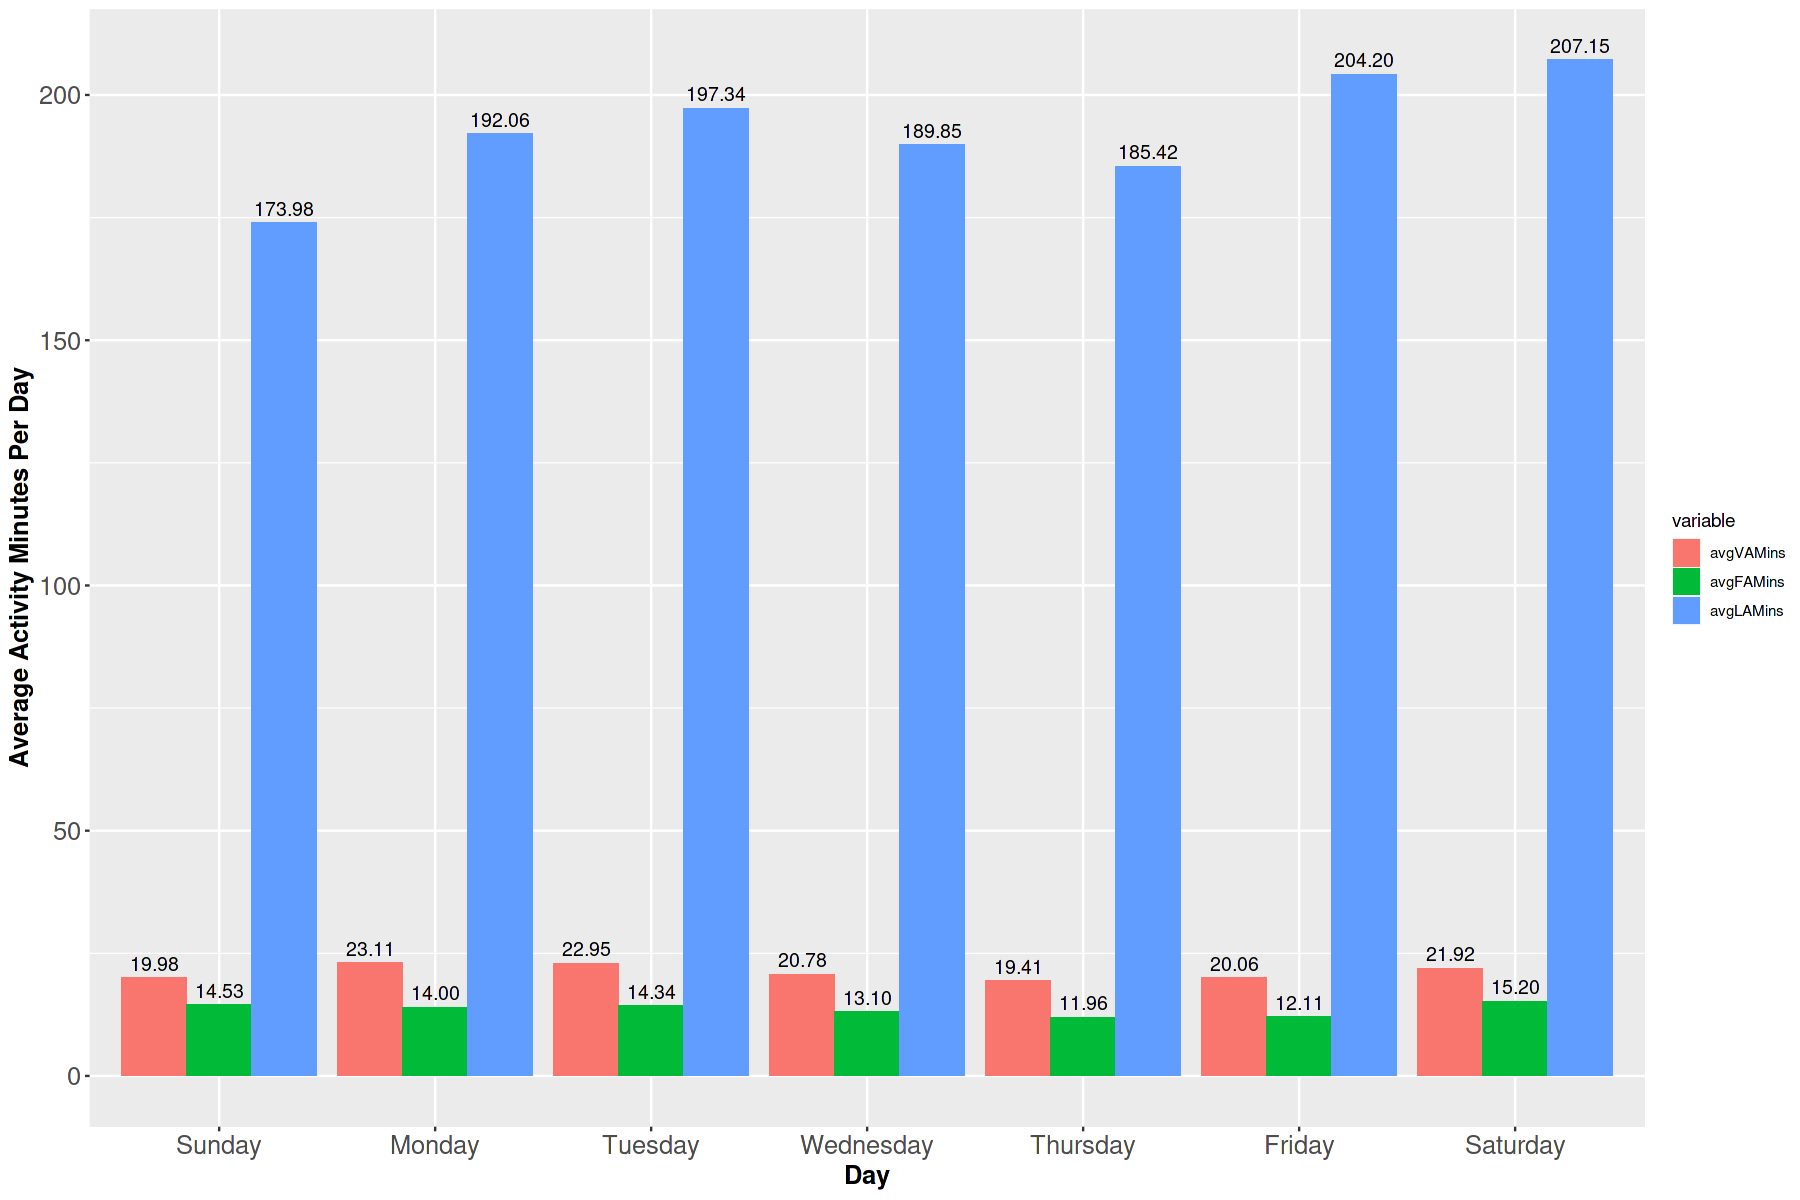

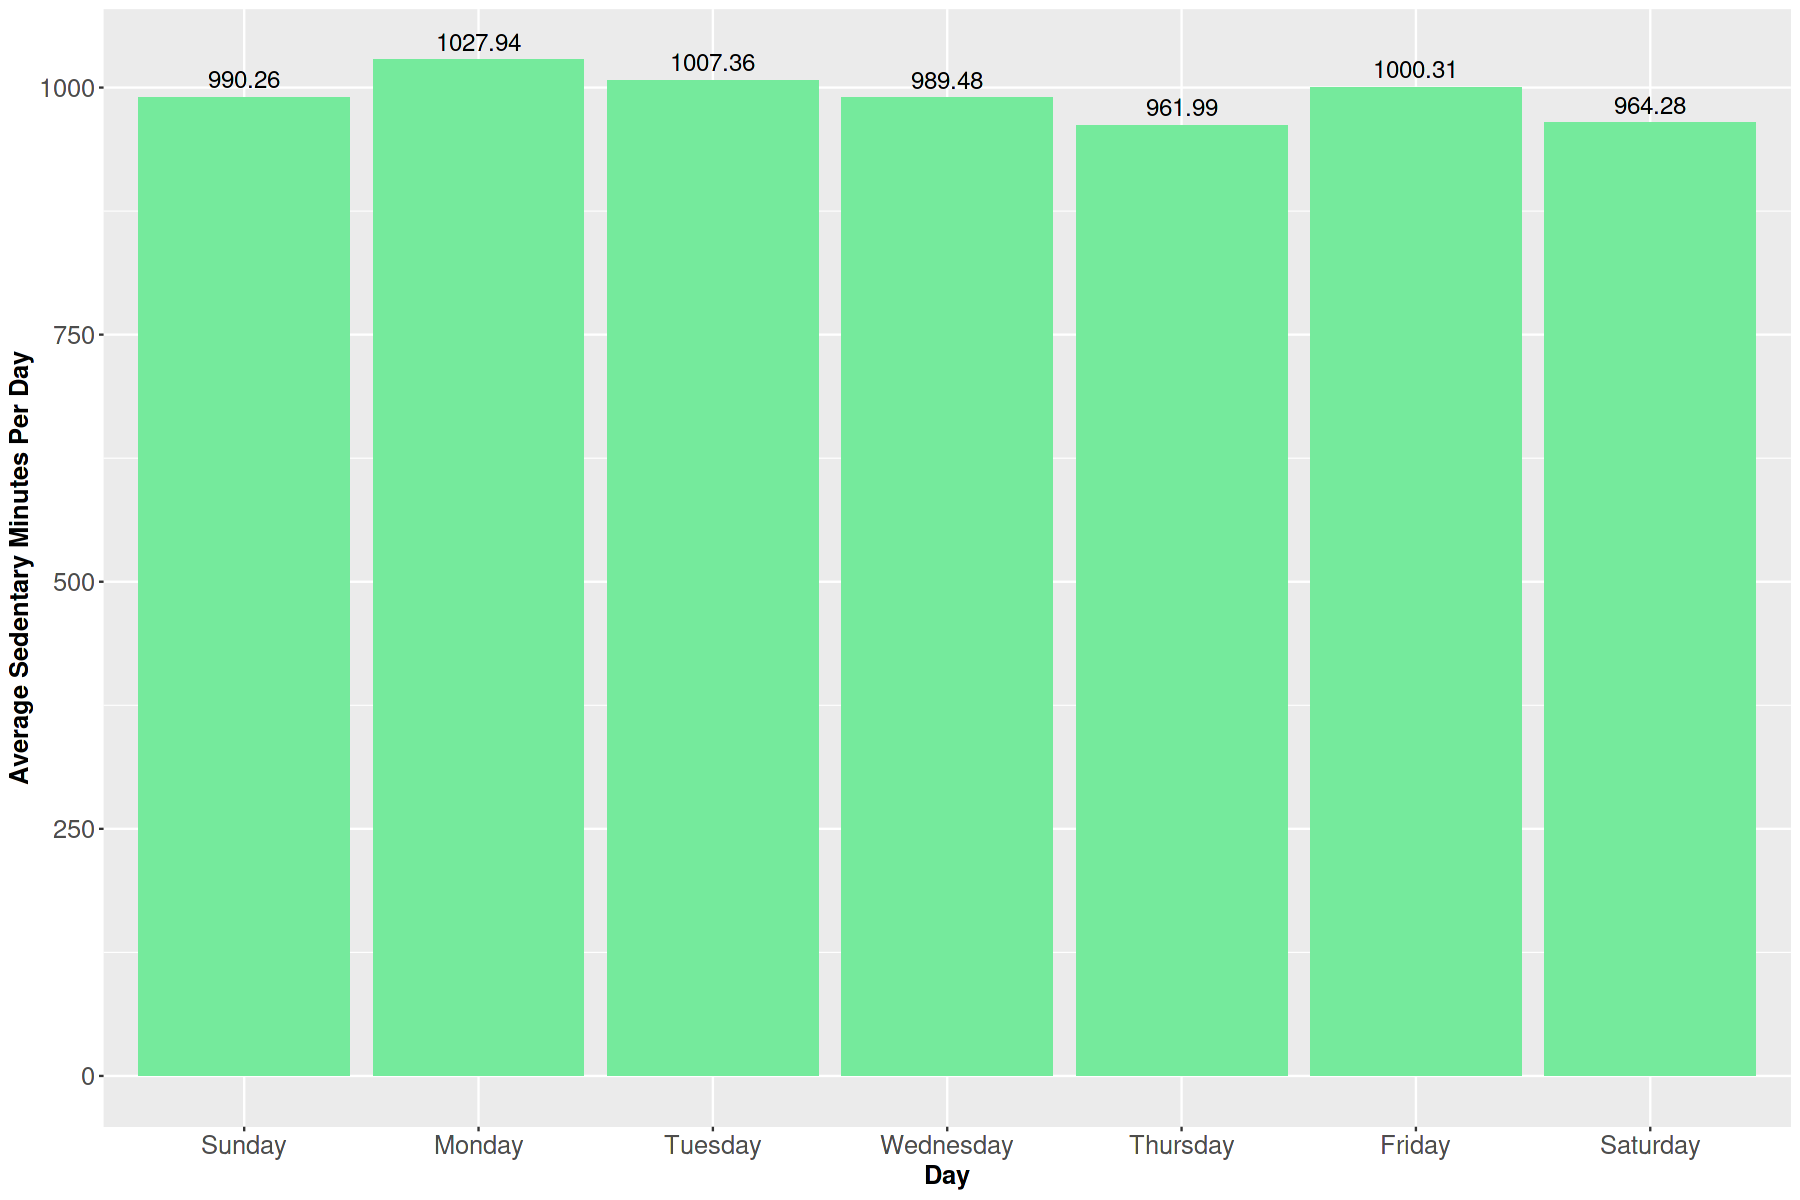

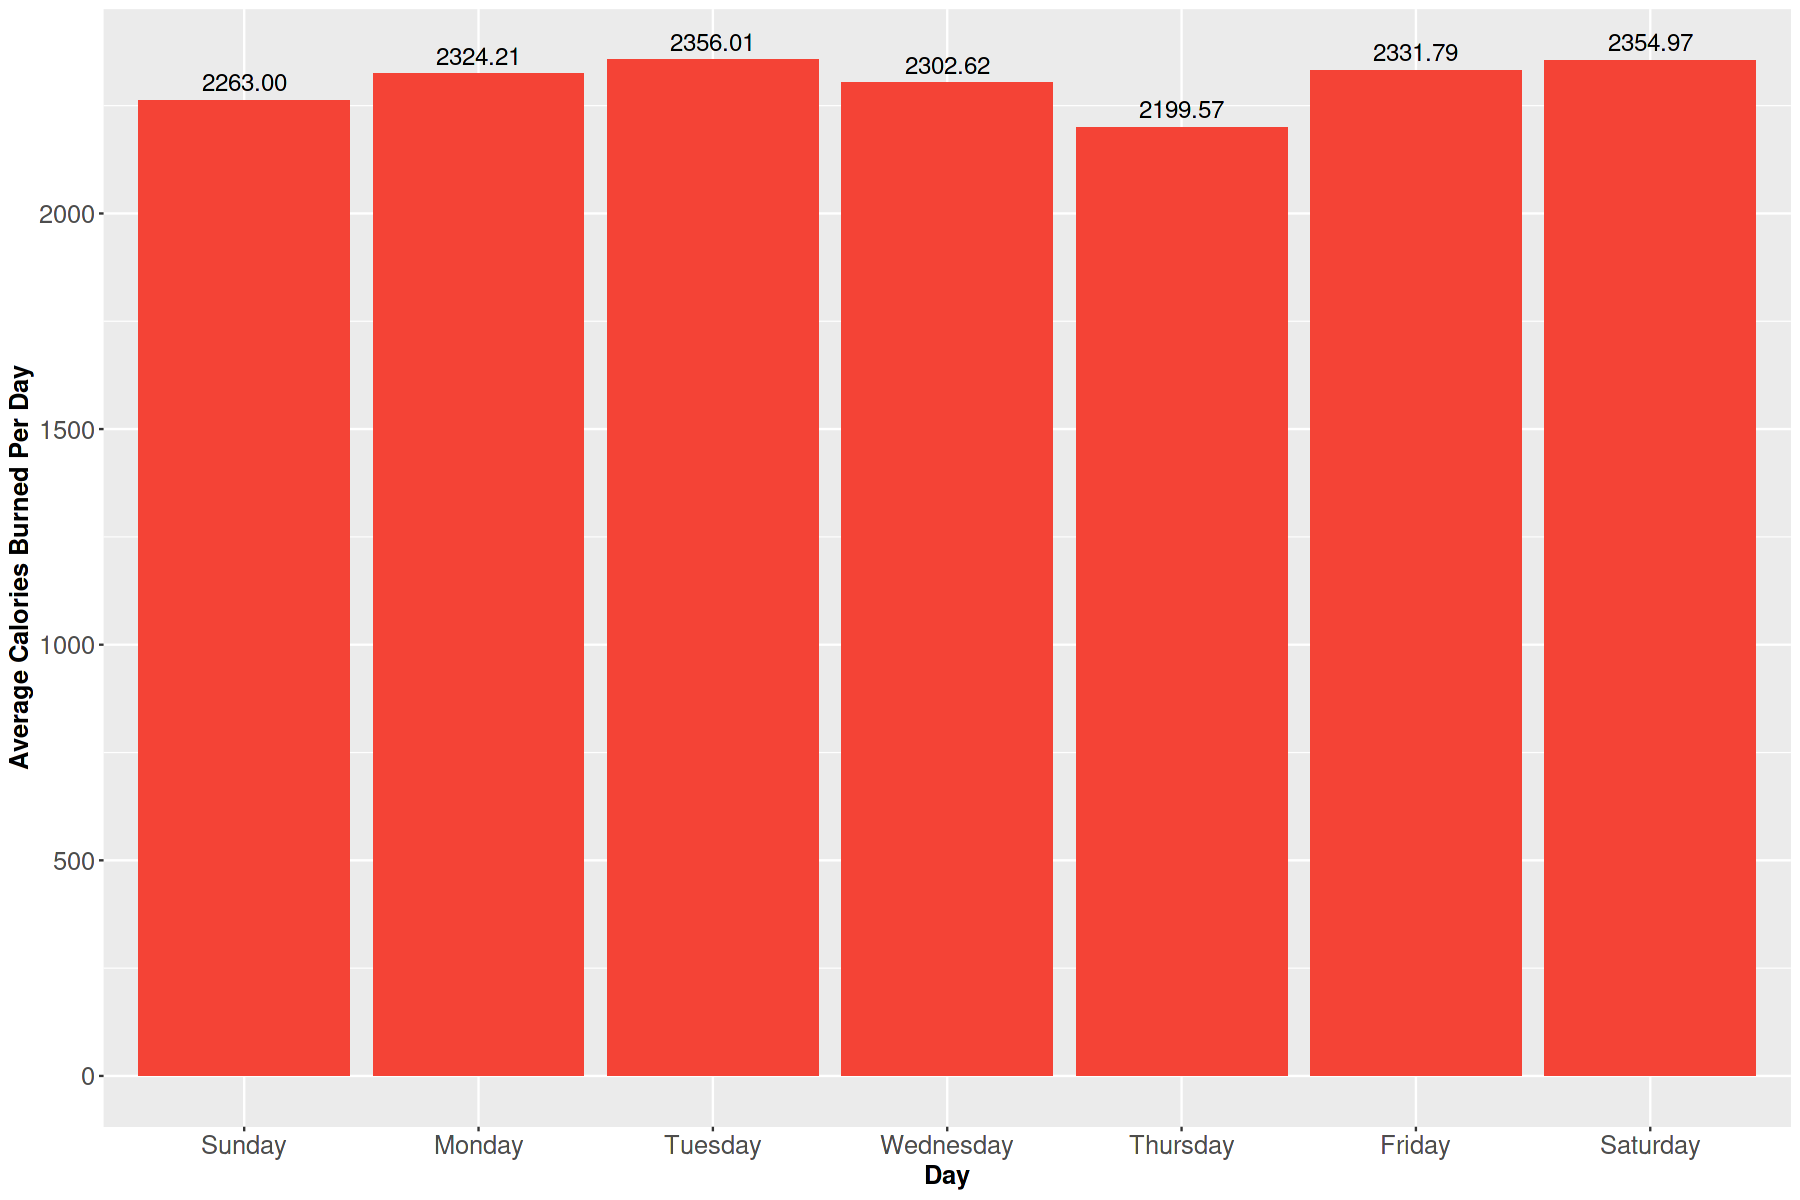

In [6]:
library(reshape2)
intensity_analysis <- step_intensity_analysis[,!(names(step_intensity_analysis) %in% c("avgSteps","avgDistance","avgSedMins","avgCal"))]
intensity_visual_analysis <- melt(intensity_analysis,id.vars = 'Day')
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(intensity_visual_analysis,aes(x=Day,y=value,fill=variable))+geom_bar(stat='identity',position='dodge')+geom_text(aes(label=sprintf("%0.2f",round(value,digits=2))),size=4,vjust = -0.5,position=position_dodge(.9))+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15,face="bold"))+labs(y="Average Activity Minutes Per Day")
ggplot(step_intensity_analysis,aes(x=Day,y=avgSedMins))+geom_col(fill = "#75ea9c")+geom_text(aes(label=sprintf("%0.2f",round(avgSedMins,digits=2))),size=5,vjust = -0.5)+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15,face="bold"))+labs(y="Average Sedentary Minutes Per Day")
ggplot(step_intensity_analysis,aes(x=Day,y=avgCal))+geom_col(fill="#f44336")+geom_text(aes(label=sprintf("%0.2f",round(avgCal,digits=2))),size=5,vjust = -0.5)+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15,face="bold"))+labs(y="Average Calories Burned Per Day")

I then look at the Average Activity Intensity Minutes, Average Sendentary Minutes and Average Calories Burned by Days of the Week:
1. The differences in time spent on Light Intensity activity over Fairly Active and Very Active Intensity activities are more prominent from the chart above. 
2. The trend for the Light Intensity activity minutes per day and Average Calories Burned per day roughly mimics the trend in the average steps per day.
3. As for sedentary activity minutes, there is not much difference that can be observed between the days of the week.

### Merging Daily Activity with Daily Sleep
Next, I decided to see the relationship between daily activity dataset and the daily sleep dataset. I merged both datasets together and excluding days/users where there are no corresponding sleep data. Then I added a new column called 'sleepEff' (i.e. Sleep Efficiency) which demonstrate how much time is spent asleep over time spent in bed in percentage form.

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.: 5206   1st Qu.: 3.600  
 Median :4.703e+09   Median :2016-04-27   Median : 8925   Median : 6.290  
 Mean   :5.001e+09   Mean   :2016-04-26   Mean   : 8541   Mean   : 6.039  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:11393   3rd Qu.: 8.030  
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :22770   Max.   :17.540  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.010   Min.   :0.0000           Min.   : 0.00     
 1st Qu.: 3.600   1st Qu.:0.0000           1st Qu.: 0.00     
 Median : 6.290   Median :0.0000           Median : 0.57     
 Mean   : 6.034   Mean   :0.1131           Mean   : 1.45     
 3rd Qu.: 8.020   3rd Qu.:0.0000           3rd Qu.: 2.37     
 Max.   :17.540   Max.   :4.0817           Max.   :12.54     
 ModeratelyActiveDistance LightActiveDist

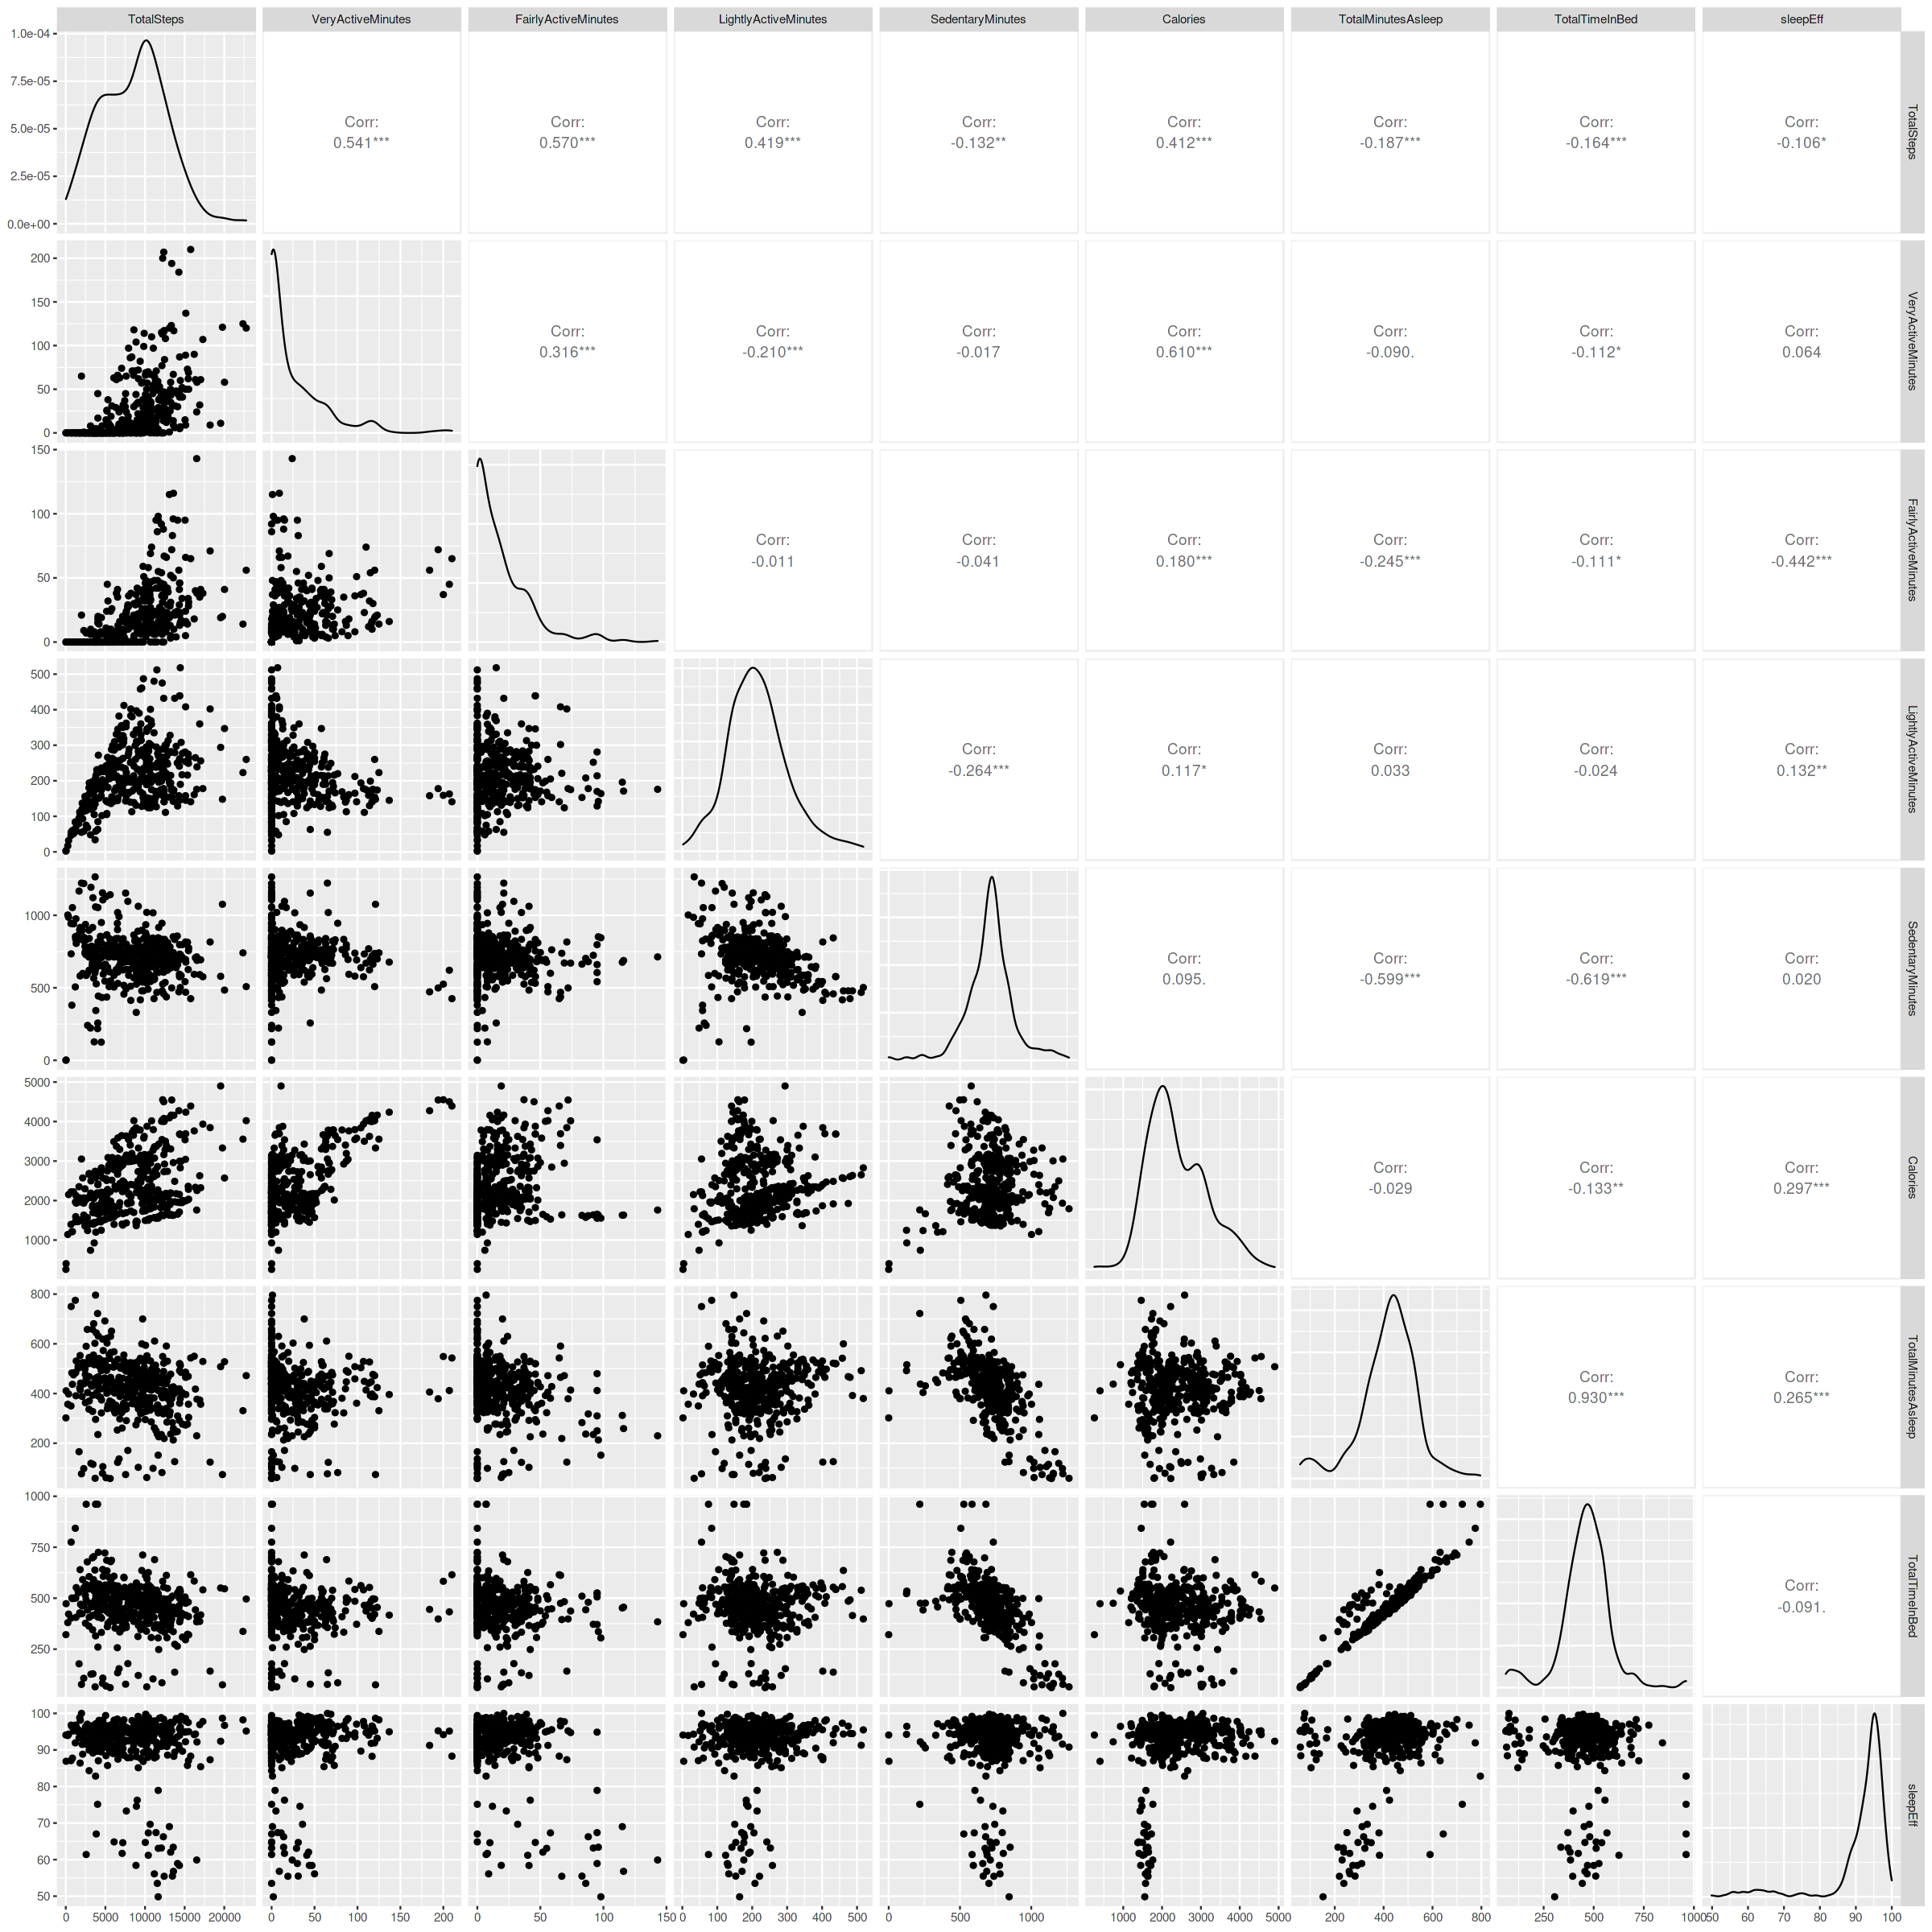

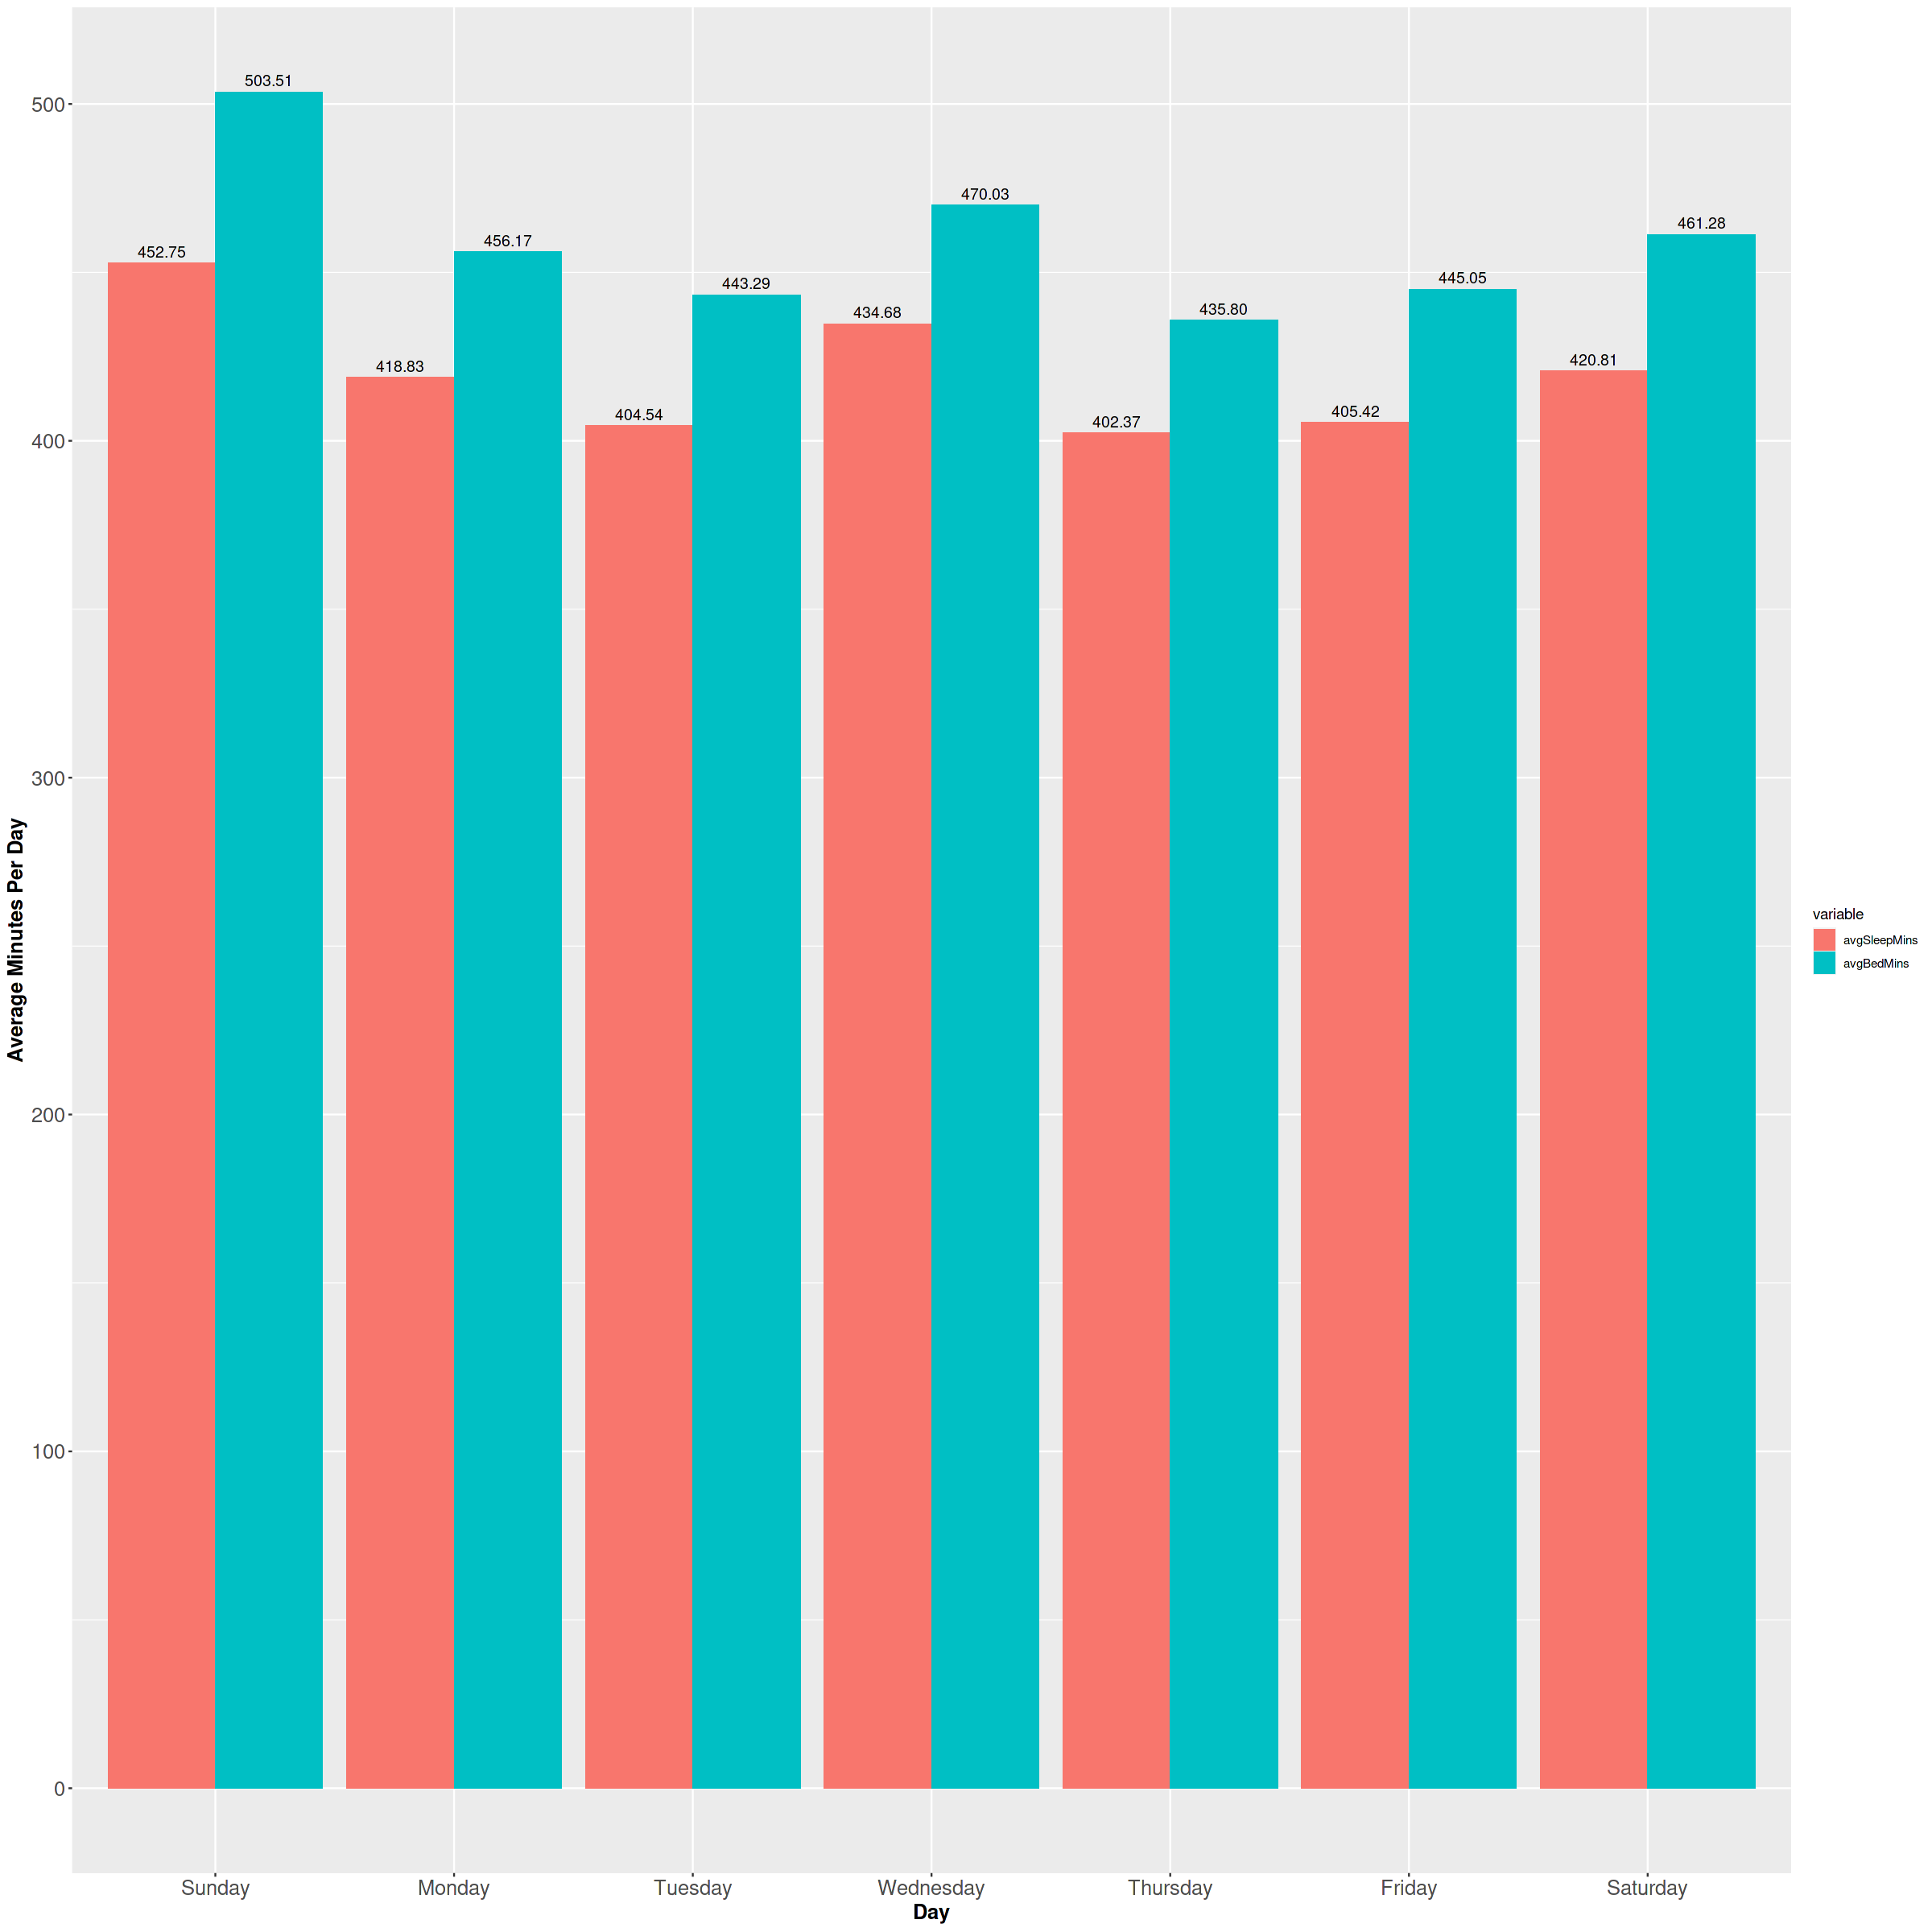

In [7]:
merge_data <- merge(daily_activity,daily_sleep, by = c("Id","Date"), all.y = TRUE)
merge_data <- merge_data %>% add_column(sleepEff=(merge_data$TotalMinutesAsleep/merge_data$TotalTimeInBed)*100)
sleep_pair_analysis <- merge_data[,c("TotalSteps","VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes","Calories","TotalMinutesAsleep","TotalTimeInBed","sleepEff")]
options(repr.plot.width = 20, repr.plot.height = 20)
summary(merge_data)
ggpairs(sleep_pair_analysis)

daily_sleep$Day <- weekdays(daily_sleep$Date)
sleep_analysis <- daily_sleep %>% group_by(Day) %>% summarise(avgSleepMins=mean(TotalMinutesAsleep),avgBedMins=mean(TotalTimeInBed)) 
sleep_analysis$Day <- factor(sleep_analysis$Day, levels = daysOrder) 
sleep_analysis <- sleep_analysis[order(sleep_analysis$Day),]
sleep_visual_analysis <- melt(sleep_analysis,id.vars = 'Day')
ggplot(sleep_visual_analysis,aes(x=Day,y=value,fill=variable))+geom_bar(stat='identity',position='dodge')+geom_text(aes(label=sprintf("%0.2f",round(value,digits=2))),size=4,vjust = -0.5,position=position_dodge(.9))+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15,face="bold"))+labs(y="Average Minutes Per Day")

A pairwise analysis was then done again but this time with the sleep data included. Based on the above, it can be observed that:
1. TotalMinutesAsleep on average is about 419 minutes or just about 7 hours of sleep. However when looking at the day to day breakdown, I found that the average time asleep for 4 out of the 5 weekdays are less than 420 minutes or 7 hours.  
2. The sleep efficiency among the users clocked in an average of 91% efficiency, which is considered very good (https://jcsm.aasm.org/doi/10.5664/jcsm.5498).
3. There is a positive correlation between Calories burned against Sleep Efficiency. This suggests that the more calories they burned, the better their sleep quality.
4. There is also a significant negative correlation between sedentary minutes and total minutes asleep, showing that people with higher sedentary minutes tend to get less sleep.

# PHASE 6: ACT

### Key Insights From This Study

Being physically active is important to the overall health of the individuals and has been shown to reduce risk of cardiovascular disease, type-2 diabetes, improve our sleep, etc. The WHO recommends healthy adults from age 18 to 64 to do 150 to 300 minutes per week of moderate intensity aerobic physical activity or at least 75 to 150 minutes per week of vigorous intensity exercise or a combination of both. However the data from this project indicates that most users on average fall below the recommended 10,000 steps per day and tend to do gravitate towards lighter activities. While this is not necessary bad as the users are not sedentary individuals, with an average of 7,500 steps per day and 190 minutes per day of light activities, more improvements could be made.  

Sleep data also show that the users tend to get lesser sleep during weekday nights, lesser than the recommended 7 hours sleep for healthy adults, which could be attributed to a busier lifestyle during working weekday nights. On the other hand, the sleep quality on average is excellent and also positively correlated with calories burned, indicating that users who burned more calories for the day may fall asleep faster and have deeper sleeps. The lack of BMI data is also evident, indicating that users tend to not manually self-log their own data. 

Source: https://www.who.int/news-room/fact-sheets/detail/physical-activity#:~:text=Regular%20physical%20activity%20is%20proven,of%20life%20and%20well%2Dbeing

### Recommendations

Companies that produce activity trackers that tracks steps, activity and sleep are in abundance but I believe what makes a wellness technology company like Bellabeat stands out is the ability to motivate and encourage its users to go the extra mile and improve their health voluntary. This is the reason why I am recommending that the Bellabeat membership program or Coach (https://bellabeat.com/coach/) should be marketed aggressively to its users. Being like a personalised coach, the program takes a holistic approach to the overall health of its users by recommending tailor-made activities and customized meal plans based on their profile and their set goals, helping users with their sleep and beauty, etc. This not only helps the users to achieve a decent amount of physical activity per week and achieve higher quality sleep everyday but it also encourages self logging of data such as weight, height and also nutritional information. Additionally, the popularity and success of Coach may draw more people into the Bellabeat ecosystem, directly increasing the sales of other Bellabeat products.   
